In [1]:
#import dependencies 
import pandas as pd
from bs4 import BeautifulSoup
import requests
import pymongo
from collections import Counter 
from splinter import Browser
executable_path = {"executable_path": "chromedriver.exe"}
browser = Browser("chrome", **executable_path, headless=False)
import time
import matplotlib.pyplot as plt

In [2]:
# visit the TDOJ death row page
death_url = 'https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html'
#call the browers and go to the url
browser.visit(death_url)

In [3]:
#grab the value in the browser
texas_html = browser.html
#convert to a beautiful soup object
texas_soup = BeautifulSoup(texas_html, 'html.parser')

In [4]:
#find the table object inside the soup object- set to variabel 
texas_table = texas_soup.find('table', class_='tdcj_table indent')

In [5]:

#gather url 
url5 = "https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html"

#read the url using pdread
tables = pd.read_html(url5)
tables



[     Execution                  Link          Link.1       Last Name  \
 0          561  Offender Information  Last Statement            King   
 1          560  Offender Information  Last Statement           Coble   
 2          559  Offender Information  Last Statement        Jennings   
 3          558  Offender Information  Last Statement    Braziel, Jr.   
 4          557  Offender Information  Last Statement          Garcia   
 5          556  Offender Information  Last Statement           Ramos   
 6          555  Offender Information  Last Statement           Acker   
 7          554  Offender Information  Last Statement           Clark   
 8          553  Offender Information  Last Statement           Young   
 9          552  Offender Information  Last Statement           Bible   
 10         551  Offender Information  Last Statement        Castillo   
 11         550  Offender Information  Last Statement          Davila   
 12         549  Offender Information  Last Stateme

In [6]:
#grab the first object in the tables variable 
df = tables[0]
#set to dataframe
df.columns = ['Execution', 'Link', 'Link', 'Last_Name', 'First_Name',
'TDCJ', 'Age', 'Date', 'Race', 'County']
df

,Execution,Link,Link,Last_Name,First_Name,TDCJ,Age,Date,Race,County
0,561,Offender Information,Last Statement,King,John,999295,44,4/24/2019,White,Jasper
1,560,Offender Information,Last Statement,Coble,Billie,976,70,2/28/2019,White,McLennan
2,559,Offender Information,Last Statement,Jennings,Robert,956,61,1/30/2019,Black,Harris
3,558,Offender Information,Last Statement,"Braziel, Jr.",Alvin,999393,43,12/11/2018,Black,Dallas
4,557,Offender Information,Last Statement,Garcia,Joseph,999441,47,12/04/2018,Hispanic,Dallas
5,556,Offender Information,Last Statement,Ramos,Robert,999062,64,11/14/2018,Hispanic,Hidalgo
6,555,Offender Information,Last Statement,Acker,Daniel,999381,46,9/27/2018,White,Hopkins
7,554,Offender Information,Last Statement,Clark,Troy,999351,51,9/26/2018,White,Smith
8,553,Offender Information,Last Statement,Young,Christopher,999508,34,7/17/2018,Black,Bexar
9,552,Offender Information,Last Statement,Bible,Danny,999455,66,6/27/2018,White,Harris


In [7]:
#group the data frame by race and find the count

grouped_race = df.groupby(['Race']).count()

In [8]:
grouped_race.head()

,Execution,Link,Link,Last_Name,First_Name,TDCJ,Age,Date,County
Race,,,,,,,,,
Black,203,203,203,203,203,203,203,203,203
Hispanic,106,106,106,106,106,106,106,106,106
Histpanic,1,1,1,1,1,1,1,1,1
Other,2,2,2,2,2,2,2,2,2
White,249,249,249,249,249,249,249,249,249


In [9]:
grouped_date = df.groupby(['Date']).count()

In [10]:
grouped_date

,Execution,Link,Link,Last_Name,First_Name,TDCJ,Age,Race,County
Date,,,,,,,,,
01/04/1995,1,1,1,1,1,1,1,1,1
01/04/2005,1,1,1,1,1,1,1,1,1
01/05/1999,1,1,1,1,1,1,1,1,1
01/06/2004,1,1,1,1,1,1,1,1,1
01/07/1988,1,1,1,1,1,1,1,1,1
01/07/2010,1,1,1,1,1,1,1,1,1
01/09/2001,1,1,1,1,1,1,1,1,1
01/09/2002,1,1,1,1,1,1,1,1,1
01/10/2007,1,1,1,1,1,1,1,1,1


In [11]:
df.Age.mean()

39.666666666666664

In [12]:
df.Age.min()

24

In [13]:
df.Age.max()

70

In [14]:
df.First_Name.nunique()

266

In [15]:
df['First_Name'].value_counts().idxmax()

'Robert'

In [16]:
df['Last_Name'].value_counts().idxmax()

'Johnson'

<class 'pandas.core.series.Series'>


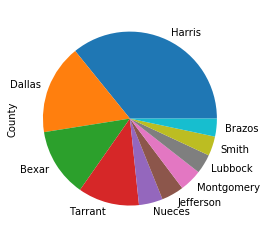

In [17]:
#grouped_county = df.groupby(['County']).max()


countrys_by_executions = df['County'].value_counts()
countrys_by_executions
print(type(countrys_by_executions)) 


s = pd.Series(countrys_by_executions)
top_ten = s.nlargest(10)
top_ten.plot.pie()

#df['County'].value_counts(sort=True).plot.pie()
plt.show()


#count().idxmax()

#grouped_county

In [18]:
df['County'].value_counts().idxmax()

'Harris'

In [19]:
#group by age and get the count of the number of prisioners at that age
grouped_age = df.groupby(['Age']).count()

In [20]:
grouped_age

,Execution,Link,Link,Last_Name,First_Name,TDCJ,Date,Race,County
Age,,,,,,,,,
24,3,3,3,3,3,3,3,3,3
25,3,3,3,3,3,3,3,3,3
26,2,2,2,2,2,2,2,2,2
27,15,15,15,15,15,15,15,15,15
28,16,16,16,16,16,16,16,16,16
29,18,18,18,18,18,18,18,18,18
30,24,24,24,24,24,24,24,24,24
31,24,24,24,24,24,24,24,24,24
32,28,28,28,28,28,28,28,28,28


In [21]:
#print the soup object
print(texas_soup)

<html lang="en-US" style="height: 100%;"><!-- InstanceBegin template="/Templates/generic_inside.dwt" codeOutsideHTMLIsLocked="false" --><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- stylesheet: global -->
<link href="/stylesheets/global.css" rel="stylesheet"/>
<!-- stylesheet: page-specific -->
<link href="/stylesheets/content.css" rel="stylesheet"/>
<link href="/stylesheets/menu_style.css" rel="stylesheet"/>
<!-- InstanceBeginEditable name="stylesheets" -->
<!-- InstanceEndEditable -->
<!-- jQuery library (if CDN fails, use local copy) -->
<script async="" src="https://ssl.google-analytics.com/ga.js" type="text/javascript"></script><script async="" src="https://ssl.google-analytics.com/ga.js" type="text/javascript"></script><script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.4.1/jquery.min.js" type="text/javascript"></script>
<script type="text/javascript"> window.jQuery || document.write('<script src="/javascripts/j

In [22]:
#find the a tags in the object

a_tags = browser.find_by_tag('a').first.value


In [23]:
a_tags

''

In [24]:
#create a list to append items to
list_of_items = []

#we are going to iterate over the table object
for a in texas_table.find_all('a', href=True):
    #take the a[href] to a link
    link = a['href']
    #take the link and append it to the 
    list_of_items.append(link)
    
    print ("Found the URL:", a['href'])

Found the URL: dr_info/kingjohn.html
Found the URL: dr_info/kingjohnlast.html
Found the URL: dr_info/_coble.jpg
Found the URL: dr_info/coblebillielast.html
Found the URL: dr_info/jenningsrobert.jpg
Found the URL: dr_info/jenningsrobertlast.html
Found the URL: dr_info/brazielalvin.html
Found the URL: dr_info/brazielalvinlast.html
Found the URL: dr_info/garciajoseph.html
Found the URL: dr_info/garciajosephlast.html
Found the URL: dr_info/_ramos.jpg
Found the URL: dr_info/ramosrobertlast.html
Found the URL: dr_info/ackerdaniel.html
Found the URL: dr_info/ackerdaniellast.html
Found the URL: dr_info/clarktroy.html
Found the URL: dr_info/clarktroylast.html
Found the URL: dr_info/youngchristopher.html
Found the URL: dr_info/youngchristopherlast.html
Found the URL: dr_info/bibledanny.html
Found the URL: dr_info/bibledannylast.html
Found the URL: dr_info/castillojuan.html
Found the URL: dr_info/castillojuanlast.html
Found the URL: dr_info/davilaerick.html
Found the URL: dr_info/davilaericklast.

Found the URL: dr_info/camachogenarolast.html
Found the URL: dr_info/narvaizleopoldo.jpg
Found the URL: dr_info/no_last_statement.html
Found the URL: dr_info/pylesjohnny.jpg
Found the URL: dr_info/pylesjohnnylast.html
Found the URL: dr_info/boggessclifford.html
Found the URL: dr_info/boggesscliffordlast.html
Found the URL: dr_info/munizpedro.jpg
Found the URL: dr_info/munizpedrolast.html
Found the URL: dr_info/carterrobertanthony.jpg
Found the URL: dr_info/carterrobertanthonylast.html
Found the URL: dr_info/mcfarlandfrank.jpg
Found the URL: dr_info/mcfarlandfranklast.html
Found the URL: dr_info/goschlesley.jpg
Found the URL: dr_info/no_last_statement.html
Found the URL: dr_info/cannonjoseph.jpg
Found the URL: dr_info/cannonjosephlast.html
Found the URL: dr_info/hoguejerry.jpg
Found the URL: dr_info/hoguejerrylast.html
Found the URL: dr_info/renfrosteven.jpg
Found the URL: dr_info/renfrostevenlast.html
Found the URL: dr_info/tuckerkarla.jpg
Found the URL: dr_info/tuckerkarlalast.html
Fo

In [25]:
# print off the list of items 
print(list_of_items)
# the items here in this list are partial strings of htmls
# we will need to use string comprehensive to take the partial strings and add them to the remaining of the url

['dr_info/kingjohn.html', 'dr_info/kingjohnlast.html', 'dr_info/_coble.jpg', 'dr_info/coblebillielast.html', 'dr_info/jenningsrobert.jpg', 'dr_info/jenningsrobertlast.html', 'dr_info/brazielalvin.html', 'dr_info/brazielalvinlast.html', 'dr_info/garciajoseph.html', 'dr_info/garciajosephlast.html', 'dr_info/_ramos.jpg', 'dr_info/ramosrobertlast.html', 'dr_info/ackerdaniel.html', 'dr_info/ackerdaniellast.html', 'dr_info/clarktroy.html', 'dr_info/clarktroylast.html', 'dr_info/youngchristopher.html', 'dr_info/youngchristopherlast.html', 'dr_info/bibledanny.html', 'dr_info/bibledannylast.html', 'dr_info/castillojuan.html', 'dr_info/castillojuanlast.html', 'dr_info/davilaerick.html', 'dr_info/davilaericklast.html', 'dr_info/rodriguezrosendo.html', 'dr_info/rodriguezrosendolast.html', 'dr_info/battagliajohn.html', 'dr_info/battagliajohnlast.html', 'dr_info/rayfordwilliam.html', 'dr_info/rayfordwilliamlast.html', 'dr_info/shoreanthony.html', 'dr_info/shoreanthonylast.html', 'dr_info/cardenasrub

In [26]:
#create new list
new_list = []
#take the partial string missing in the list in the prior cell
s = "https://www.tdcj.texas.gov/death_row/"
# for loop thorugh the existing list
for i in list_of_items:
    #take the partial string in the list
    new = s+str(i)
    #add the two strings together after convering i to a string
    new_list.append(new)
    #add to the new list and 
    print(new)

https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html
https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html
https://www.tdcj.texas.gov/death_row/dr_info/_coble.jpg
https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html
https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobert.jpg
https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html
https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html
https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html
https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html
https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html
https://www.tdcj.texas.gov/death_row/dr_info/_ramos.jpg
https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html
https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html
https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniellast.html
https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.html
https://www.tdcj.texas.gov/death_row/dr_info/clarktro

https://www.tdcj.texas.gov/death_row/dr_info/pattersontoronto.jpg
https://www.tdcj.texas.gov/death_row/dr_info/pattersontorontolast.html
https://www.tdcj.texas.gov/death_row/dr_info/etheridgegary.jpg
https://www.tdcj.texas.gov/death_row/dr_info/etheridgegarylast.html
https://www.tdcj.texas.gov/death_row/dr_info/medinajavier.jpg
https://www.tdcj.texas.gov/death_row/dr_info/medinajavierlast.html
https://www.tdcj.texas.gov/death_row/dr_info/jonestj.jpg
https://www.tdcj.texas.gov/death_row/dr_info/jonestjlast.html
https://www.tdcj.texas.gov/death_row/dr_info/kutznerrichard.jpg
https://www.tdcj.texas.gov/death_row/dr_info/kutznerrichardlast.html
https://www.tdcj.texas.gov/death_row/dr_info/williamsjeffrey.jpg
https://www.tdcj.texas.gov/death_row/dr_info/williamsjeffreylast.html
https://www.tdcj.texas.gov/death_row/dr_info/coulsonrobert.jpg
https://www.tdcj.texas.gov/death_row/dr_info/coulsonrobertlast.html
https://www.tdcj.texas.gov/death_row/dr_info/reneaudaniel.jpg
https://www.tdcj.texas.

https://www.tdcj.texas.gov/death_row/dr_info/kingleonlast.html
https://www.tdcj.texas.gov/death_row/dr_info/landryraymond.jpg
https://www.tdcj.texas.gov/death_row/dr_info/no_last_statement.html
https://www.tdcj.texas.gov/death_row/dr_info/franklindonald.jpg
https://www.tdcj.texas.gov/death_row/dr_info/no_last_statement.html
https://www.tdcj.texas.gov/death_row/dr_info/streetmanrobert.jpg
https://www.tdcj.texas.gov/death_row/dr_info/no_last_statement.html
https://www.tdcj.texas.gov/death_row/dr_info/starvaggijoseph.jpg
https://www.tdcj.texas.gov/death_row/dr_info/no_last_statement.html
https://www.tdcj.texas.gov/death_row/dr_info/thompsonjohn.jpg
https://www.tdcj.texas.gov/death_row/dr_info/no_last_statement.html
https://www.tdcj.texas.gov/death_row/dr_info/no_info_available.html
https://www.tdcj.texas.gov/death_row/dr_info/no_last_statement.html
https://www.tdcj.texas.gov/death_row/dr_info/williamsanthony.jpg
https://www.tdcj.texas.gov/death_row/dr_info/williamsanthonylast.html
https:/

In [27]:
# print the new list--note that several of the items have death_row//death_row/ instead of death_row/death_row/
new_list

['https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/_coble.jpg',
 'https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobert.jpg',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/_ramos.jpg',
 'https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniellast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.

In [28]:
html_links=[]
jpeg_links=[]

#note that each offender has two or three  links, one with just their names and the #
#second with the word jpeg and then a third with the word last 
for link in new_list:
    #if the string URL contains hrml append to html links
    if "html" in link: 
        html_links.append(link)
    else:
        #otherwise send to jpeg links
        jpeg_links.append(link)
            
            
        
    

In [29]:

html_links

['https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniellast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/youngchristopher.html',
 'https://www.tdcj.texas.gov/death_row/dr_

In [30]:
#take the results in html links, create an text file, iterate through the list and write each item to the text doc. 
with open('html_links.txt', 'w') as f:
    for item in html_links:
        f.write("%s\n" % item)

In [31]:
#take the results in jpeg links, create an text file, iterate through the list and write each item to the text doc. 

with open('jpeg_links.txt', 'w') as f:
    for item in jpeg_links:
        f.write("%s\n" % item)



In [32]:
#there are prisoners who did not give a statement, these are dead links, we are going to remove them 

dead_links = []
final_statements = []

#go through html links 
for link in html_links:
    #remove html stings with the word no_ in them
    if "no_" in link: 
        dead_links.append(link)
        #if no exists put it to the dead links list
    else:
        #otherwise append to final statements 
        final_statements.append(link)
            


In [33]:
#print the final statements
final_statements

['https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniellast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/youngchristopher.html',
 'https://www.tdcj.texas.gov/death_row/dr_

In [34]:
typos = []
final_final_statements = []
#the typos from the previous list which includes death_row//death_row, we want to take those off as it will throw and error
#when we try to vist that website 
for link in final_statements:
    
    if "death_row//death_row" in link: 
        typos.append(link)
    else:
        final_final_statements.append(link)
            

In [35]:
typos

['https://www.tdcj.texas.gov/death_row//death_row/dr_info/cardenasrubenlast.html',
 'https://www.tdcj.texas.gov/death_row//death_row/dr_info/pruettrobert.html',
 'https://www.tdcj.texas.gov/death_row//death_row/dr_info/pruettrobertlast.html']

In [36]:
final_final_statements

['https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/kingjohnlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/coblebillielast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/jenningsrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvinlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajosephlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ramosrobertlast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniellast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroylast.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/youngchristopher.html',
 'https://www.tdcj.texas.gov/death_row/dr_

In [37]:

# we only want links which deather their "last" statement so we want to strip out the superfulious links 

others = []
last_statements = []
for link in final_final_statements:
    
    if "last.html" in link: 
        last_statements.append(link)
    else:
        others.append(link)

In [38]:
others

['https://www.tdcj.texas.gov/death_row/dr_info/kingjohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/brazielalvin.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/garciajoseph.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/ackerdaniel.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/clarktroy.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/youngchristopher.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/bibledanny.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/castillojuan.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/davilaerick.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/rodriguezrosendo.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/battagliajohn.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/rayfordwilliam.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/shoreanthony.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/cardenasruben.html',
 'https://www.tdcj.texas.gov/death_row/dr_info/preyortaichin.

In [39]:
statements_final = []
counter = 0


for link in last_statements:
    
    if counter == 561:
        break
    
    browser.visit(link)
    html1 = browser.html
    soup1 = BeautifulSoup(html1, 'html.parser')
  
    page = soup1.find_all("p")
    
        
    statement = str(page)
    test1 = BeautifulSoup(statement)
    clean = test1.get_text()
    
    
   
    
    statements_final.append(clean)
    counter += 1
    
    

In [40]:
print(statements_final)
print(type(statements_final))

allstatements = str(statements_final)
print(allstatements)


['[Date of Execution:, April 24, 2019  , Offender:, John William King, TDCJ #999295, Last Statement:, Spoken: No., Written Statement: Capital Punishment: Them without the capital get the punishment.]', '[Date of Execution:, February 28, 2019  , Offender:, Billie Wayne Coble, TDCJ #000976, Last Statement:, Yes Sir, that will be five Dollars I love you, I love  you, and I love you. Mike I love you. Where’s Nelley at? I love you. That will  be five dollars. Take Care.”]', '[Date of Execution:,  January 30, 2019,  Offender:  , Robert Mitchell Jennings, Last Statement:  , To my friends and family it was a nice journey. To the  family of the police officer I hope this finds you peace and be well and stay  safe. Enjoy life’s moments because we never get them back.]', '[Date of Execution:,  December 11, 2018,  Offender:  , Alvin Avon Braziel, Jr. #999393, Last Statement:  , Yes Sir, I would like to thank the Shape Community  Center for all their support. I would like to thank all those oversea

In [41]:
mystring = str(statements_final)
print(mystring)


soup = BeautifulSoup(mystring)

print(soup.get_text())

['[Date of Execution:, April 24, 2019  , Offender:, John William King, TDCJ #999295, Last Statement:, Spoken: No., Written Statement: Capital Punishment: Them without the capital get the punishment.]', '[Date of Execution:, February 28, 2019  , Offender:, Billie Wayne Coble, TDCJ #000976, Last Statement:, Yes Sir, that will be five Dollars I love you, I love  you, and I love you. Mike I love you. Where’s Nelley at? I love you. That will  be five dollars. Take Care.”]', '[Date of Execution:,  January 30, 2019,  Offender:  , Robert Mitchell Jennings, Last Statement:  , To my friends and family it was a nice journey. To the  family of the police officer I hope this finds you peace and be well and stay  safe. Enjoy life’s moments because we never get them back.]', '[Date of Execution:,  December 11, 2018,  Offender:  , Alvin Avon Braziel, Jr. #999393, Last Statement:  , Yes Sir, I would like to thank the Shape Community  Center for all their support. I would like to thank all those oversea

In [42]:
#data_set = "Capital Punishment: Them without the capital get the punishment."
  
# split() returns list of all the words in the string 
split_it = allstatements.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(50) 
  
print(most_occur) 

[('I', 3414), ('to', 1628), ('and', 1369), ('the', 1286), ('you', 1184), ('of', 1168), ('my', 894), ('for', 835), ('that', 746), ('love', 720), (',', 617), ('all', 553), ('am', 519), ('a', 511), ('have', 509), ('is', 495), ('in', 485), ('Last', 457), ('me', 388), ('Statement:,', 349), ('Execution:,', 335), ('your', 321), ('not', 314), ('know', 314), ('will', 313), ('be', 306), ('Offender:,', 297), ('this', 277), ('you.', 271), ('it', 246), ('would', 242), ('want', 242), ('like', 236), ('with', 236), ("'[Date", 230), ('me.', 212), ('what', 211), ('"[Date', 205), ('on', 197), ('are', 182), ('was', 180), (']",', 179), ('family', 176), ('thank', 176), ('but', 172), ('God', 171), ('Offender:', 158), ('hope', 158), ('just', 148), ('To', 147)]


In [44]:
print(type(most_occur))

print(type(most_occur)) 

<class 'list'>
<class 'list'>


In [59]:
words = []
counts = []
for item in most_occur:
    words.append(item[0])
    counts.append(item[1])
    #print(item[1])
    
    
    
    #print(item)
    
    
    #word = most_occur[0]
    #words.append(word)
    #counts1 = most_occur[0][1]
    #counts.append(counts1)
        



#most_occur[0]
#most_occur[0][0]

In [61]:
print(words)
print(counts)

['I', 'to', 'and', 'the', 'you', 'of', 'my', 'for', 'that', 'love', ',', 'all', 'am', 'a', 'have', 'is', 'in', 'Last', 'me', 'Statement:,', 'Execution:,', 'your', 'not', 'know', 'will', 'be', 'Offender:,', 'this', 'you.', 'it', 'would', 'want', 'like', 'with', "'[Date", 'me.', 'what', '"[Date', 'on', 'are', 'was', ']",', 'family', 'thank', 'but', 'God', 'Offender:', 'hope', 'just', 'To']
[3414, 1628, 1369, 1286, 1184, 1168, 894, 835, 746, 720, 617, 553, 519, 511, 509, 495, 485, 457, 388, 349, 335, 321, 314, 314, 313, 306, 297, 277, 271, 246, 242, 242, 236, 236, 230, 212, 211, 205, 197, 182, 180, 179, 176, 176, 172, 171, 158, 158, 148, 147]


In [67]:
len(words)

50

In [68]:
len(counts)

50

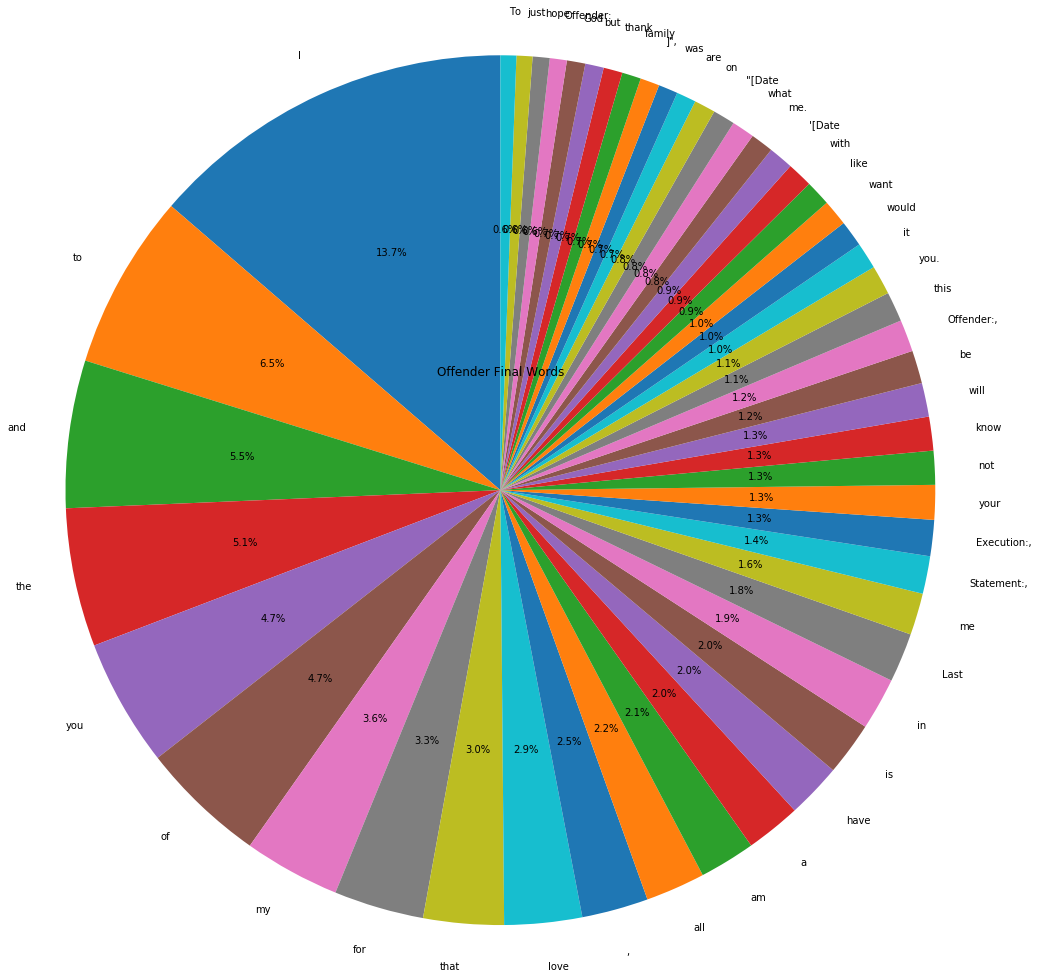

In [71]:
province_population = counts
activities = words

plt.pie(province_population, labels=activities, startangle=90, autopct='%.1f%%', radius=5)
plt.title('Offender Final Words')
plt.show()